## Implementing Neural Networks from Scratch

In [2]:
import numpy as np
import pandas as pd

# this library can make datasets for you
from sklearn.datasets import make_classification       # makes dummy datasets
X,Y = make_classification(n_samples = 1000, n_features=5,random_state=42)
# The X variable will contain the features of the synthetic dataset (1000 samples and 5 features), 
# and the Y variable will contain the corresponding labels or classes.

In [4]:
X.shape

(1000, 5)

In [5]:
X = X.T
# features as rows, and training examples as columns

In [6]:
Y.shape

(1000,)

In [9]:
Y = Y.reshape(1,-1)

In [10]:
Y.shape

(1, 1000)

In [11]:
nn_arch = [
    # layer_units == number of features in the dataset (j for the input layer)
    {'layer_units':5, 'activation':'none'}, #for the input layer -- A.F. is none on input layer
    {'layer_units':6, 'activation':'relu'}, #inner layer: Relu is preferred
    {'layer_units':5, 'activation':'relu'}, #
    {'layer_units':4, 'activation':'relu'}, #
    {'layer_units':1, 'activation':'sigmoid'} #
]

In [12]:
def initialised_parameters(nn_arch,seed_value):
    #  seed_value=any non-zero number, for the *same initialisation* or same parameters are initialised
    np.random.seed(seed_value)
    number_of_layers = len(nn_arch)
    # number of layers(hidden + output) will be equal to the number of weights and bias
    parameters = {}     #to store weights and bias of each layer
    for l in range(1, number_of_layers):        # starting from 1 cz we dont include input layer
        parameters['W'+str(l)] = np.random.randn(
            nn_arch[l]['layer_units'],#number of rows hoga
            nn_arch[l-1]['layer_units'], #number of cols hoga
        )*0.001     #initialising weights small, to prevent vanishing grad
        # shape of W, is n x (n-1)
        parameters['b'+str(l)] = np.zeros((nn_arch[l]['layer_units'],1))
    return parameters


In [13]:
parameters = initialised_parameters(nn_arch, 3)
print(parameters)

{'W1': array([[ 1.78862847e-03,  4.36509851e-04,  9.64974681e-05,
        -1.86349270e-03, -2.77388203e-04],
       [-3.54758979e-04, -8.27414815e-05, -6.27000677e-04,
        -4.38181690e-05, -4.77218030e-04],
       [-1.31386475e-03,  8.84622380e-04,  8.81318042e-04,
         1.70957306e-03,  5.00336422e-05],
       [-4.04677415e-04, -5.45359948e-04, -1.54647732e-03,
         9.82367434e-04, -1.10106763e-03],
       [-1.18504653e-03, -2.05649899e-04,  1.48614836e-03,
         2.36716267e-04, -1.02378514e-03],
       [-7.12993200e-04,  6.25244966e-04, -1.60513363e-04,
        -7.68836350e-04, -2.30030722e-04]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 7.45056266e-04,  1.97611078e-03, -1.24412333e-03,
        -6.26416911e-04, -8.03766095e-04, -2.41908317e-03],
       [-9.23792022e-04, -1.02387576e-03,  1.12397796e-03,
        -1.31914233e-04, -1.62328545e-03,  6.46675452e-04],
       [-3.56270759e-04, -1.74314104e-03, -5.9664

In [16]:
# defining sigmoid activation
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [18]:
# defining ReLU activation
def relu(z):
    return np.maximum(0,z)

In [56]:
# # activation of the first layer is the feature matrix
# def forward_propogation(nn_arch, parameters, X):
#     forward_cache = {}
#     number_of_layers = len(nn_arch)
#     A_prev = X          #previous layer's activation
#     for l in range(1, number_of_layers):
#         W=parameters['W'+str(l)]        #weight for the lth layer
#         b = parameters['b'+str(l)]
#         activation = nn_arch[l]['activation']
#         if activation=='relu':
#             forward_cache['Z'+str(l)] = np.dot(W, A_prev)+b
#             forward_cache['A'+str(l)] = relu(forward_cache['Z'+str(l)])
#         elif activation=='sigmoid':
#             forward_cache['Z'+str(l)] = np.dot(W, A_prev)+b
#             forward_cache['A'+str(l)] = sigmoid(forward_cache['Z'+str(l)])
#         AL = forward_cache['A'+str(l)]
#         forward_cache['A0']=X
#     return AL, forward_cache

# # if the number of activation energies increase, just add them as if-elif cases
    
#     # AL = Activation of last layer, used for cost computation
        


In [19]:
# activation of the first layer is the feature matrix i.e. X
def forward_propogation(nn_arch, parameters, X):
#activation of 0th layer is the input matrix X
#need z and activation of each layer ==> save in a dict
    forward_cache = {}      # output for forward ppn, storing Z, and 'A' value for each layer
    no_of_layers = len(nn_arch)
    #need to initialize A0
    # to find z and activation of each layer we need activation of prev layer
    A_prev = X
    for l in range(1, no_of_layers): # skipping the input layer
        W_curr =parameters['W'+str(l)] #weight for lth layer
        b_curr = parameters['b'+str(l)]
        activation = nn_arch[l]['activation'] 
        if activation == "relu":
            #find Z and A
            Z = np.dot(W_curr,A_prev)+b_curr
            forward_cache['Z'+str(l)] = Z
            forward_cache['A'+str(l)] = relu(Z)
        elif activation == "sigmoid":
            Z = np.dot(W_curr,A_prev)+b_curr
            forward_cache['Z'+str(l)] = Z
            forward_cache['A'+str(l)] = sigmoid(Z)
        A_prev = forward_cache['A'+str(l)]
    #activation of last layer => used for cost computation
    AL = forward_cache['A'+str(l)]  #predicted value
    forward_cache['A0'] = X #since there is no A0 stored, we add it like this
    #while updating gradient of weight matrix dw=dz A(l-1)
    return AL,forward_cache

In [20]:
AL, forward_cache = forward_propogation(nn_arch, parameters, X)

In [22]:
forward_cache

{'Z1': array([[-0.00113971,  0.00692636,  0.00384648, ...,  0.0041308 ,
          0.00221318, -0.00699822],
        [ 0.00101709, -0.00143515,  0.00012757, ...,  0.00016915,
          0.00073472,  0.0016195 ],
        [ 0.00097616, -0.01035406, -0.00711056, ..., -0.00357408,
         -0.00321353,  0.00803496],
        [ 0.00248941, -0.00342589,  0.00037942, ...,  0.00046934,
          0.00184267,  0.00388897],
        [ 0.00015737, -0.00814989, -0.00666476, ..., -0.00116081,
         -0.00263019,  0.00462603],
        [ 0.00067275, -0.00246309, -0.00113984, ..., -0.00048647,
         -0.00016409,  0.00214385]]),
 'A1': array([[0.        , 0.00692636, 0.00384648, ..., 0.0041308 , 0.00221318,
         0.        ],
        [0.00101709, 0.        , 0.00012757, ..., 0.00016915, 0.00073472,
         0.0016195 ],
        [0.00097616, 0.        , 0.        , ..., 0.        , 0.        ,
         0.00803496],
        [0.00248941, 0.        , 0.00037942, ..., 0.00046934, 0.00184267,
         0.0

In [23]:
# we'll pass actual(Y) and predicted(AL) values
def compute_cost(AL, Y):
    n=Y.shape[1] #jitna Y ya AL ke number of examples hain
    cost = (-1/n)*np.sum((Y*np.log(AL))+((1-Y)*np.log(1-AL)))       #1,n size hoga
    return np.squeeze(cost)     #to return a value(scalar)=>(1,1) and squeezing it's axes


In [24]:
cost = compute_cost(AL, Y)
print(cost)

0.6931471805591218


In [25]:
# this is to calculate dz = da*g'(z)
def sigmoid_backward(dA,Z):
    S = sigmoid(Z)      #g(z)
    dS = S*(1-S)        #g'(z)
    return dA*dS

In [27]:
def relu_backward(dA,Z):
    dr = np.array(Z, copy=True)
    dr[Z>0] = 1
    dr[Z<=0] = 0  
    return dr*dA

In [28]:
def back_propogation(Y,AL,nn_arch,parameters,forward_cache):
    n=Y.shape[1]
    grads = {}      #loss
    number_of_layers = len(nn_arch)
    # gradient of loss wrt to predicted value 
    dAL=(AL-Y)/(AL*(1-AL))
    dA_prev = dAL

    # n is the number of examples
    # L is for the number of layers
    # k is the number of features
    for l in reversed(range(1,number_of_layers)):
        # first take out all the important information
        Z_curr = forward_cache['Z'+str(l)]
        W_curr = parameters['W'+str(l)]
        A_prev = forward_cache['A'+str(l-1)]       # this is needed of the previous entry
        activation = nn_arch[l]['activation']

        if activation=='sigmoid':
            dZl = sigmoid_backward(dA_prev, Z_curr)
            grads['dW'+str(l)]=(1/n)*np.dot(dZl,A_prev.T)     #gradient's dictionary
            grads['db'+str(l)]=(1/n)*np.sum(dZl,axis=1,keepdims=True)
            dA_prev = np.dot(W_curr.T,dZl)
        
        elif activation=='relu':
            dZl = relu_backward(dA_prev, Z_curr)
            grads['dW'+str(l)]=(1/n)*np.dot(dZl,A_prev.T)     #gradient's dictionary
            grads['db'+str(l)]=(1/n)*np.sum(dZl,axis=1,keepdims=True)
            dA_prev = np.dot(W_curr.T,dZl)

    return grads



In [29]:
grads = back_propogation(Y,AL,nn_arch,parameters,forward_cache)

In [30]:
def update_parameters(grads,parameters,lr, nn_arch):
    number_of_layers = len(nn_arch)
    for l in range(1, number_of_layers):
        parameters['W'+str(l)] = parameters['W'+str(l)]-lr*grads['dW'+str(l)]
        parameters['b'+str(l)] = parameters['b'+str(l)]-lr*grads['db'+str(l)]
    return parameters

In [31]:
#all topgether in one prgm to train

def training_phase(nn_arch,X,Y,lr,iterations):      #learning rate(lr)
    parameters = initialised_parameters(nn_arch,3)
    costs=[]
    for i in range(iterations):
        AL, forward_cache = forward_propogation(nn_arch,parameters,X)
        cost = compute_cost(AL,Y)

        if(i%100 == 0):     #we save after 100 iterations 
            costs.append(cost)
            print('Iteration: '+str(i)+' Cost:'+str(cost))
        grads = back_propogation(Y,AL,nn_arch,parameters,forward_cache)
        parameters = update_parameters(grads,parameters,lr, nn_arch)

    return costs, parameters

In [32]:
costs, parameters = training_phase(nn_arch, X, Y, 0.01,3000)

Iteration: 0 Cost:0.6931471805591218
Iteration: 100 Cost:0.6931471805559634
Iteration: 200 Cost:0.6931471805556841
Iteration: 300 Cost:0.6931471805554056
Iteration: 400 Cost:0.6931471805551285
Iteration: 500 Cost:0.6931471805548579
Iteration: 600 Cost:0.6931471805545988
Iteration: 700 Cost:0.693147180554357
Iteration: 800 Cost:0.693147180554129
Iteration: 900 Cost:0.6931471805539149
Iteration: 1000 Cost:0.6931471805537165
Iteration: 1100 Cost:0.6931471805535298
Iteration: 1200 Cost:0.6931471805533629
Iteration: 1300 Cost:0.6931471805532073
Iteration: 1400 Cost:0.6931471805530627
Iteration: 1500 Cost:0.6931471805529326
Iteration: 1600 Cost:0.6931471805528121
Iteration: 1700 Cost:0.693147180552702
Iteration: 1800 Cost:0.6931471805525994
Iteration: 1900 Cost:0.6931471805525039
Iteration: 2000 Cost:0.6931471805524145
Iteration: 2100 Cost:0.6931471805523295
Iteration: 2200 Cost:0.6931471805522502
Iteration: 2300 Cost:0.6931471805521774
Iteration: 2400 Cost:0.6931471805521094
Iteration: 2500

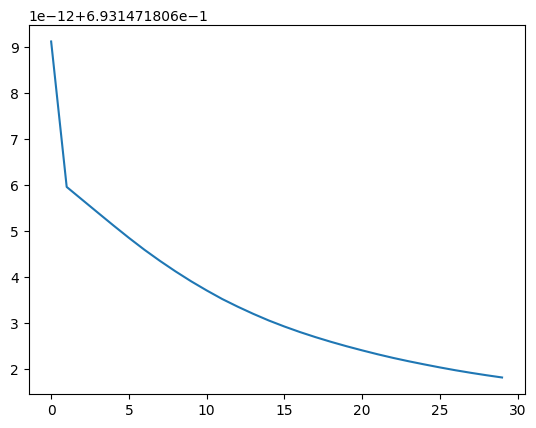

In [33]:
import matplotlib.pyplot as plt
plt.plot(costs)